# Image Augmentation

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [3]:
x_train = train_datagen.flow_from_directory('D:\\Project Buildathon\\Fertilizers_Recommendation_ System_For_Disease_ Prediction\\Dataset Plant Disease\\fruit-dataset\\fruit-dataset\\train',target_size = (128,128),batch_size=8,class_mode = 'categorical')
x_test = test_datagen.flow_from_directory('D:\\Project Buildathon\\Fertilizers_Recommendation_ System_For_Disease_ Prediction\\Dataset Plant Disease\\fruit-dataset\\fruit-dataset\\test',target_size = (128,128),batch_size=8,class_mode = 'categorical')

Found 5384 images belonging to 6 classes.
Found 1686 images belonging to 6 classes.


In [4]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

# CNN

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [6]:
model = Sequential()

In [7]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [8]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [9]:
model.add(Flatten())

# Hidden Layers

In [10]:
model.add(Dense(128 ,activation='relu'))
model.add(Dense(64,activation = 'relu'))

# Output Layer

In [11]:
model.add(Dense(6,activation = 'softmax'))

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 128)               16257152  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                        

In [14]:
model.fit_generator(x_train,steps_per_epoch=5384//8,validation_data=x_test,validation_steps=1686//8,epochs=10)

C:\Users\VISHWANTH BAVIREDDY\AppData\Local\Temp\ipykernel_8872\1515256012.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=5384//8,validation_data=x_test,validation_steps=1686//8,epochs=10)


Epoch 1/10
673/673 [==============================] - 175s 258ms/step - loss: 0.4570 - accuracy: 0.8423 - val_loss: 0.2609 - val_accuracy: 0.9167
Epoch 2/10
673/673 [==============================] - 121s 179ms/step - loss: 0.2536 - accuracy: 0.9120 - val_loss: 0.2470 - val_accuracy: 0.9220
Epoch 3/10
673/673 [==============================] - 124s 184ms/step - loss: 0.2021 - accuracy: 0.9318 - val_loss: 0.1411 - val_accuracy: 0.9571
Epoch 4/10
673/673 [==============================] - 128s 190ms/step - loss: 0.1801 - accuracy: 0.9411 - val_loss: 0.1480 - val_accuracy: 0.9565
Epoch 5/10
673/673 [==============================] - 131s 195ms/step - loss: 0.1693 - accuracy: 0.9426 - val_loss: 0.1298 - val_accuracy: 0.9643
Epoch 6/10
673/673 [==============================] - 130s 193ms/step - loss: 0.1496 - accuracy: 0.9487 - val_loss: 0.1553 - val_accuracy: 0.9548
Epoch 7/10
673/673 [==============================] - 131s 195ms/step - loss: 0.1366 - accuracy: 0.9547 - val_loss: 0.1290 -

# Saving The Model

In [15]:
model.save("fruit.h5")

# Test the model

In [35]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [36]:
#Load the model

model =load_model("fruit.h5")

In [37]:
img = image.load_img("D:\\Project Buildathon\\Fertilizers_Recommendation_ System_For_Disease_ Prediction\\Dataset Plant Disease\\fruit-dataset\\fruit-dataset\\test\\Apple___healthy\\00fca0da-2db3-481b-b98a-9b67bb7b105c___RS_HL 7708.JPG")

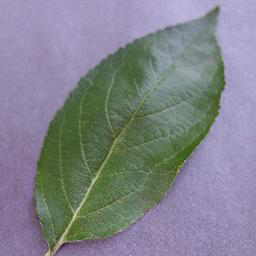

In [38]:
img

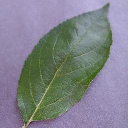

In [39]:
img = image.load_img("D:\\Project Buildathon\\Fertilizers_Recommendation_ System_For_Disease_ Prediction\\Dataset Plant Disease\\fruit-dataset\\fruit-dataset\\test\\Apple___healthy\\00fca0da-2db3-481b-b98a-9b67bb7b105c___RS_HL 7708.JPG",target_size=(128,128))
img

In [40]:
x=image.img_to_array(img)

In [41]:
x

array([[[165., 153., 189.],
        [165., 153., 189.],
        [165., 153., 189.],
        ...,
        [176., 170., 206.],
        [176., 170., 206.],
        [176., 170., 206.]],

       [[164., 152., 188.],
        [164., 152., 188.],
        [164., 152., 188.],
        ...,
        [173., 167., 203.],
        [172., 166., 202.],
        [172., 166., 202.]],

       [[163., 151., 187.],
        [163., 151., 187.],
        [163., 151., 187.],
        ...,
        [172., 166., 202.],
        [170., 164., 200.],
        [169., 163., 199.]],

       ...,

       [[135., 119., 156.],
        [139., 123., 160.],
        [134., 118., 155.],
        ...,
        [143., 133., 168.],
        [138., 128., 163.],
        [141., 131., 166.]],

       [[136., 120., 157.],
        [134., 118., 155.],
        [134., 118., 155.],
        ...,
        [141., 131., 166.],
        [141., 131., 166.],
        [146., 136., 171.]],

       [[135., 119., 156.],
        [140., 124., 161.],
        [143., 1

In [42]:
x=np.expand_dims(x,axis=0)

In [43]:
x

array([[[[165., 153., 189.],
         [165., 153., 189.],
         [165., 153., 189.],
         ...,
         [176., 170., 206.],
         [176., 170., 206.],
         [176., 170., 206.]],

        [[164., 152., 188.],
         [164., 152., 188.],
         [164., 152., 188.],
         ...,
         [173., 167., 203.],
         [172., 166., 202.],
         [172., 166., 202.]],

        [[163., 151., 187.],
         [163., 151., 187.],
         [163., 151., 187.],
         ...,
         [172., 166., 202.],
         [170., 164., 200.],
         [169., 163., 199.]],

        ...,

        [[135., 119., 156.],
         [139., 123., 160.],
         [134., 118., 155.],
         ...,
         [143., 133., 168.],
         [138., 128., 163.],
         [141., 131., 166.]],

        [[136., 120., 157.],
         [134., 118., 155.],
         [134., 118., 155.],
         ...,
         [141., 131., 166.],
         [141., 131., 166.],
         [146., 136., 171.]],

        [[135., 119., 156.],
       

In [46]:
pred = np.argmax(model.predict(x),axis=1)

In [47]:
pred

array([1], dtype=int64)

In [48]:
x_test.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [49]:
index=['Apple___Black_rot',
 'Apple___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy']

In [50]:
index[pred[0]]

'Apple___healthy'

In [65]:
img = image.load_img("D:\\Project Buildathon\\Fertilizers_Recommendation_ System_For_Disease_ Prediction\\Dataset Plant Disease\\fruit-dataset\\fruit-dataset\\test\\Apple___healthy\\00fca0da-2db3-481b-b98a-9b67bb7b105c___RS_HL 7708.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x),axis=1)

index=['Apple___Black_rot',
 'Apple___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy']

index[pred[0]]

'Apple___healthy'

In [63]:
img = image.load_img("D:\\Project Buildathon\\Fertilizers_Recommendation_ System_For_Disease_ Prediction\\Dataset Plant Disease\\fruit-dataset\\fruit-dataset\\train\\Apple___healthy\\23b5f9bf-18d8-43d3-a289-6398a7abde91___RS_HL 7914.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x),axis=1)

index=['Apple___Black_rot',
 'Apple___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy']

index[pred[0]]

'Apple___healthy'

In [60]:
img = image.load_img("D:\\Project Buildathon\\Fertilizers_Recommendation_ System_For_Disease_ Prediction\\Dataset Plant Disease\\fruit-dataset\\fruit-dataset\\train\\Peach___Bacterial_spot\\9a12d280-624e-43e2-a1d0-f8ada91fdf82___Rutg._Bact.S 1840.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x),axis=1)

index=['Apple___Black_rot',
 'Apple___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy']

index[pred[0]]

'Peach___Bacterial_spot'

In [62]:
img = image.load_img("D:\\Project Buildathon\\Fertilizers_Recommendation_ System_For_Disease_ Prediction\\Dataset Plant Disease\\fruit-dataset\\fruit-dataset\\train\\Peach___healthy\\5abd9d91-43c1-4a97-be7e-883bb74df34b___Rutg._HL 2395.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x),axis=1)

index=['Apple___Black_rot',
 'Apple___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy']

index[pred[0]]

'Peach___healthy'